Микроканонический ансабль для идеального газа

1) Выбираем случайную частицу и меняем её координаты в фазовом пространстве

2) Вычисляем $\Delta E$

3) Если $\Delta E<0$, добавляем $|\Delta E|$ демону, $E_d\Longrightarrow E_d + |\Delta E|$ и принимаем конфигурацию

4) Если $\Delta E>0$, то отнимаем энергию у демона, если её достаточно, $E_d\Longrightarrow E_d-\Delta E$ и принимаем новую конфигурацию. Иначе берём старую конфигурацию вместо новой

Пример: $d=1$ (размерность пространства), $N=40$ (количество частиц), $E_0=10$ (начальная энергия), $\Delta=0.5$, $E_d=0.5$ (энергия демона), $v_0=\sqrt{2E_0/N}$ (начальные скорости всех частиц)

Найти $\left<E\right>, \left<E_d\right>$ и постройте распрееление по скоростям.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
number_of_particles = 40000
E_0 = 10 #initial energy of the system
delta = 0.075 #boarder for velocity varitation
E_d = 0.5 #Demon's energy
initial_velocity = np.sqrt(2 * E_0 / number_of_particles)

molecules = np.ones(number_of_particles) * initial_velocity

In [3]:
#Generators of random uniform value and random int
def next_random_uniform_value(delta = delta):
    while 1:
        yield np.random.uniform(-1 * delta, delta)

def next_random_int(number_of_particles = number_of_particles):
    while 1:
        yield np.random.randint(number_of_particles)
        
        
ruv = next_random_uniform_value()
ri = next_random_int()
#next(ruv), next(ri)

In [4]:
#Checks if the new configurations should be accepted
#At the same time make a count of accepted and non-accepted configurations

def algorithm_condition(velocity_change, velocity, E_d, E_0, accepted, non_accepted):
    new_velocity = velocity - velocity_change
    delta_E = (new_velocity ** 2 - velocity ** 2) / 2
    if(delta_E <= 0):
        accepted += 1
        return E_0 + delta_E, new_velocity, E_d - delta_E, accepted, non_accepted
    elif(delta_E > 0 and E_d > delta_E):
        accepted += 1
        return E_0 + delta_E, new_velocity, E_d - delta_E, accepted, non_accepted
    else:
        non_accepted += 1
        return E_0, velocity, E_d, accepted, non_accepted

In [5]:
N = 6000000 #number of iterations
E = np.zeros(N + 1)
E[0] = E_0

accepted = 0
non_accepted = 0

for i in range(N):
    random_int = next(ri)
    velocity_change = next(ruv)
    E[i+1], molecules[random_int], E_d, accepted, non_accepted \
    = algorithm_condition(velocity_change=velocity_change, 
                          velocity=molecules[random_int], E_d=E_d, E_0=E_0, 
                          accepted=accepted, non_accepted=non_accepted)
    
print("Accepted: " + str(round((accepted / N * 100), 2)) + "%")
print("Non-accepted: " + str(round((non_accepted / N * 100), 2)) + "%")

Accepted: 46.23%
Non-accepted: 53.77%


In [6]:
max(molecules)

0.0921506273468193

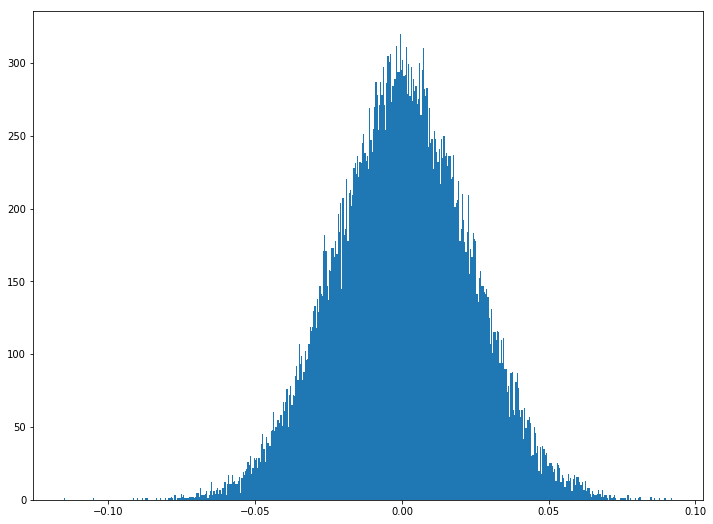

In [7]:
figure = plt.figure(figsize = (12, 9))

plt.hist(molecules, bins=500)
plt.show()

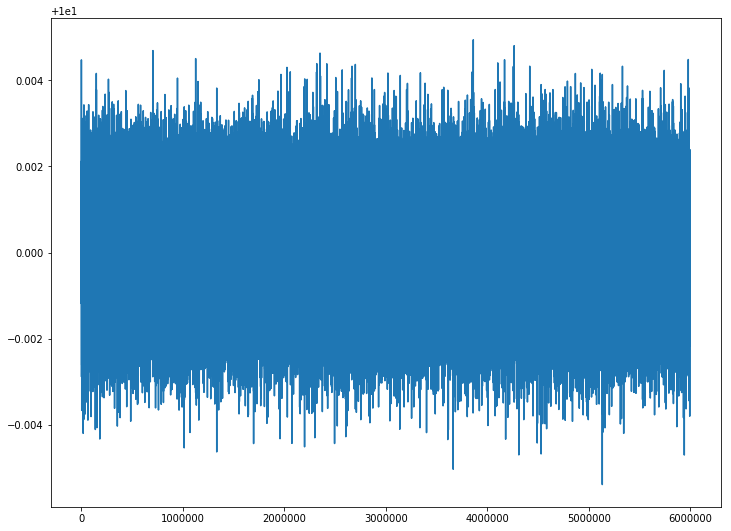

In [8]:
figure = plt.figure(figsize = (12, 9))

plt.plot(E)
plt.show()

In [9]:
#Average energy
np.mean(E[500000:])

9.999999999906478